### 1 什么是matplotlib

2D、简单、交互、数据可视化

#### 1.1容器层

3）Axes：坐标轴
2）figure（白纸）：需要先实例化
1）canvas（画板）

#### 1.2辅助显示层（类似图例）

#### 1.3图像层

绘制什么图象的声明

### 2 简单实现一个Matplotlib画图

figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True)
num:图像编号或名称，数字为编号 ，字符串为名称
figsize:指定figure的宽和高，单位为英寸；
dpi参数指定绘图对象的分辨率，即每英寸多少个像素，缺省值为80      1英寸等于2.5cm,A4纸是 21*30cm的纸张 
facecolor:背景颜色
edgecolor:边框颜色
frameon:是否显示边框

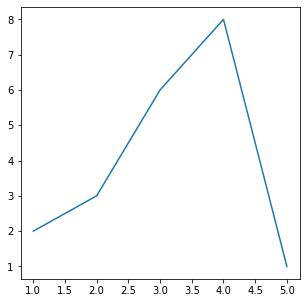

In [22]:
#准备：导入matplotlib
import matplotlib.pyplot as plt
#1.创建画布
plt.figure(figsize=(5,5),facecolor='white',edgecolor='grey')
#2.绘制图像
x=[1,2,3,4,5]
y=[2,3,6,8,1]
#3.显示图像
plt.plot(x,y)#plt.plt(x,y)就不行AttributeError: module ’matplotlib‘ has no attribute ’plt‘
#保存图像
plt.savefig("2.png")
plt.show()#会释放内存，在这之前将图像保存

#### 2.1准备数据并画出初始折线图

eg：显示温度变化状况
显示出某城市11点到12点1小时内每分钟的温度变化折线图，温度在15度到18度随机生成
uniform方法将在 [x,y] 范围内随机生成一个实数，如下
https://www.jb51.net/article/157225.htm
[random.uniform[15,18]for i in x]列表生成式，可以查看如下链接了解
https://blog.csdn.net/qq_40628106/article/details/85039366

#### 2.2添加x，y轴刻度
y_ticks
plt.yticks（）

#### 2.3添加表格

grid（）

#### 2.4添加描述

#### 2.5显示图例

plot(,label=)
legend（）


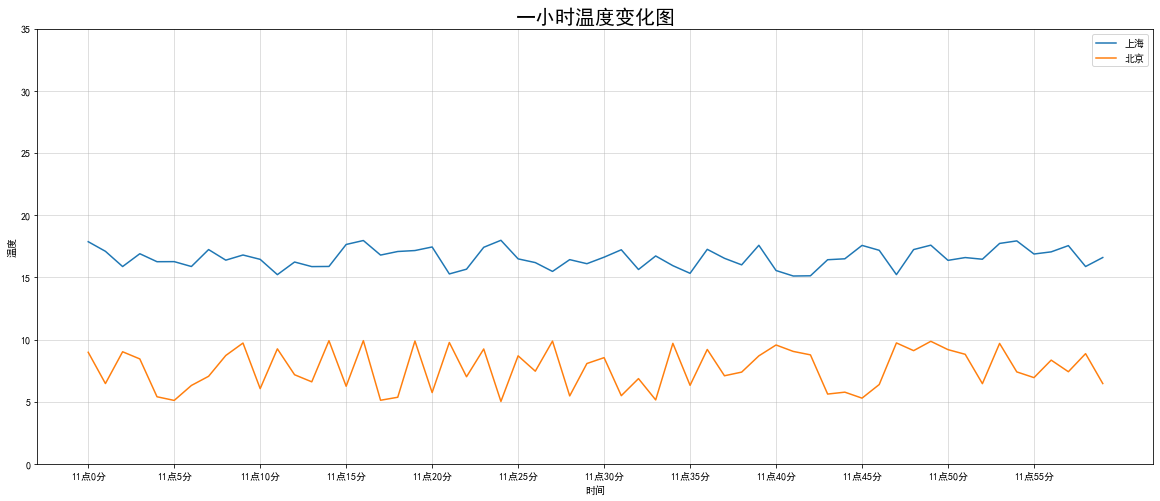

In [41]:
import random
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#准备x，y坐标的数据
x=range(60)
y_shanghai=[random.uniform(15,18)for i in x]
y_beijing=[random.uniform(5,10)for i in x]
#画布
plt.figure(figsize=(20,8),facecolor='white',edgecolor='blue')
#画图(多条)
plt.plot(x,y_shanghai,label="上海")
plt.plot(x,y_beijing,label="北京")
plt.legend()
#2.2添加刻度
y_ticks=range(40)
x_ticks_labels=["11点{}分".format(i) for i in x]
plt.yticks(y_ticks[::5])
plt.xticks(x[::5],x_ticks_labels[::5])
#添加网格显示
plt.grid(True,linestyle='-',alpha=0.5)
#2.4
plt.xlabel("时间")
plt.ylabel("温度")
plt.title("一小时温度变化图",fontsize=20)
#展示 
plt.show()